# Task
Tell me about this dataset.

Here is all the data you need:
"British_Airway_Review.csv"

## Data loading

### Subtask:
Load the dataset "British_Airway_Review.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "British_Airway_Review.csv" into a pandas DataFrame and display its first 5 rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('British_Airway_Review.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'British_Airway_Review.csv' not found.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,✅ Trip Verified | I had the most fantastic BA...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,✅ Trip Verified | Couldn’t book in online. Ar...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,✅ Trip Verified | London Heathrow to Mumbai in...,31st July 2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,"✅ Trip Verified | Keflavík, Iceland to London ...",31st July 2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,✅ Trip Verified | Terrible Experience with Bri...,29th July 2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


(2500, 8)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, including the number of rows and columns, data types of each column, and the presence of missing values. Also, look for the distribution of key variables.


**Reasoning**:
I need to explore the dataset's structure, data types, missing values, and distributions of key variables using `.info()`, `.describe()`, and `.value_counts()`. I'll also analyze the 'reviews' and 'date' columns specifically.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame
df.info()

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe(include='number'))

# Value counts for categorical columns
categorical_cols = ['country', 'seat_type', 'recommended', 'route', 'type_of_traveller']
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())

# Analyze the 'reviews' column
print("\nAnalysis of the 'reviews' column:")
df['review_length'] = df['reviews'].str.len()
print("Average review length:", df['review_length'].mean())
print("First few reviews:")
for review in df['reviews'].head(3):
    print(review[:100] + "...")  # Print the first 100 characters of each review


# Analyze the 'date' column
print("\nAnalysis of the 'date' column:")
print("First few dates:", df['date'].head())
print("Data type of 'date' column:", df['date'].dtype)
print("Unique dates:", df['date'].nunique())

Shape of the DataFrame: (2500, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reviews            2500 non-null   object
 1   date               2500 non-null   object
 2   country            2500 non-null   object
 3   seat_type          2500 non-null   object
 4   recommended        2500 non-null   object
 5   stars              2500 non-null   int64 
 6   route              2500 non-null   object
 7   type_of_traveller  2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB

Descriptive statistics for numerical columns:


,stars
count,2500.000000
mean,4.272000
std,2.135378
min,1.000000
25%,3.000000
50%,3.000000
75%,5.000000
max,9.000000



Value counts for 'country':


,count
country,
United Kingdom,1552
United States,300
Canada,80
Australia,75
Germany,53
...,...
Indonesia,1
Bahrain,1
Dominican Republic,1



Value counts for 'seat_type':


,count
seat_type,
Economy Class,1363
Business Class,754
Premium Economy,248
First Class,135



Value counts for 'recommended':


,count
recommended,
no,1620
yes,880



Value counts for 'route':


,count
route,
Heathrow to Las Vegas,250
Rome to Heathrow,250
Gatwick to Venice,250
London to Luanda,250
Denver to Heathrow,250
BKK to LHR,250
London to Tampa,250
London to Sydney,250
LHR to CPT,250



Value counts for 'type_of_traveller':


,count
type_of_traveller,
Couple Leisure,1000
Family Leisure,500
Solo Leisure,500
Business,500



Analysis of the 'reviews' column:
Average review length: 930.2328
First few reviews:
✅ Trip Verified |  I had the most fantastic BA Flight today. The cabin crew in my seat zone 6D were ...
✅ Trip Verified |  Couldn’t book in online. Arrived at check in to find we had been bumped off due t...
✅ Trip Verified | London Heathrow to Mumbai in a Boeing 787-8 in Business Class. The lounge near Ter...

Analysis of the 'date' column:
First few dates: 0    1st August 2023
1     31st July 2023
2     31st July 2023
3     31st July 2023
4     29th July 2023
Name: date, dtype: object
Data type of 'date' column: object
Unique dates: 1469


## Data analysis

### Subtask:
Perform more in-depth analysis of the dataset, focusing on identifying potential outliers and relationships between variables.


**Reasoning**:
Identify outliers in numerical features ('stars' and 'review_length') using box plots and IQR, analyze the relationship between numerical and categorical variables, and perform basic sentiment analysis.



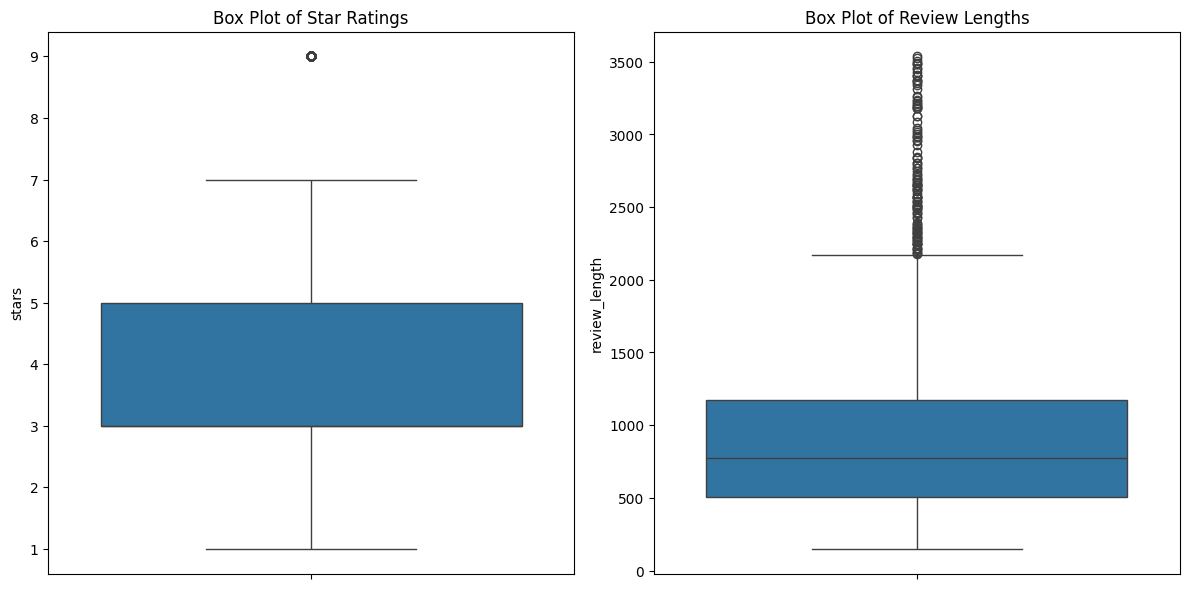

Stars outliers: below 0.0 and above 8.0
Review Length outliers: below -500.875 and above 2178.125


<ipython-input-3-09924bf606ba>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='seat_type', y='stars', data=df, ci=None)


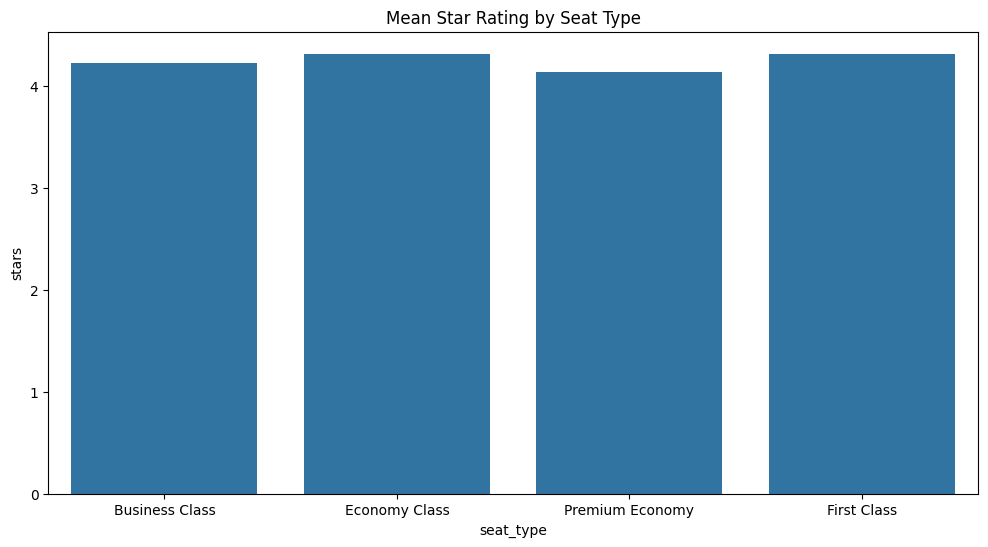

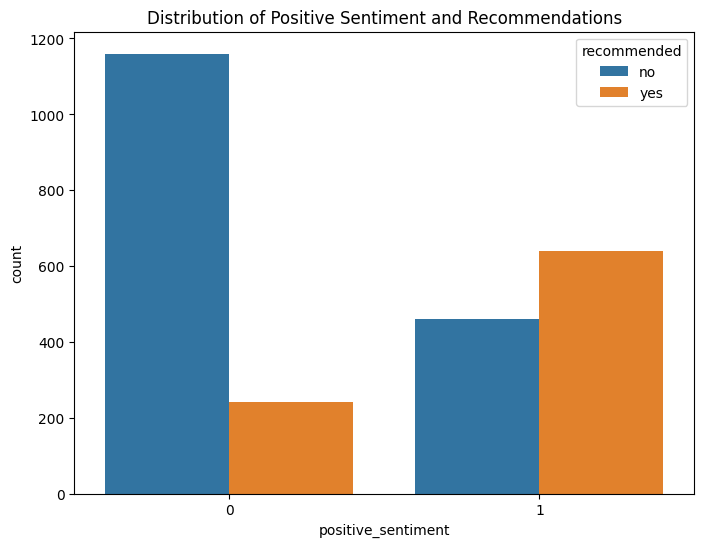

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Detection
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['stars'])
plt.title('Box Plot of Star Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['review_length'])
plt.title('Box Plot of Review Lengths')
plt.tight_layout()
plt.show()


# Calculate IQR for 'stars' and 'review_length'
Q1_stars = df['stars'].quantile(0.25)
Q3_stars = df['stars'].quantile(0.75)
IQR_stars = Q3_stars - Q1_stars
lower_bound_stars = Q1_stars - 1.5 * IQR_stars
upper_bound_stars = Q3_stars + 1.5 * IQR_stars

Q1_review_length = df['review_length'].quantile(0.25)
Q3_review_length = df['review_length'].quantile(0.75)
IQR_review_length = Q3_review_length - Q1_review_length
lower_bound_review_length = Q1_review_length - 1.5 * IQR_review_length
upper_bound_review_length = Q3_review_length + 1.5 * IQR_review_length

print(f"Stars outliers: below {lower_bound_stars} and above {upper_bound_stars}")
print(f"Review Length outliers: below {lower_bound_review_length} and above {upper_bound_review_length}")


# Relationship between Numerical and Categorical Variables
plt.figure(figsize=(12, 6))
sns.barplot(x='seat_type', y='stars', data=df, ci=None)
plt.title('Mean Star Rating by Seat Type')
plt.show()

# Basic sentiment analysis (example using a simple positive word list)
positive_words = ['good', 'great', 'excellent', 'fantastic', 'amazing']
df['positive_sentiment'] = df['reviews'].str.lower().str.contains('|'.join(positive_words)).astype(int)

plt.figure(figsize=(8, 6))
sns.countplot(x='positive_sentiment', data=df, hue='recommended')
plt.title('Distribution of Positive Sentiment and Recommendations')
plt.show()

**Reasoning**:
Convert the 'date' column to datetime objects and analyze the distribution of reviews over time, looking for trends or seasonality.



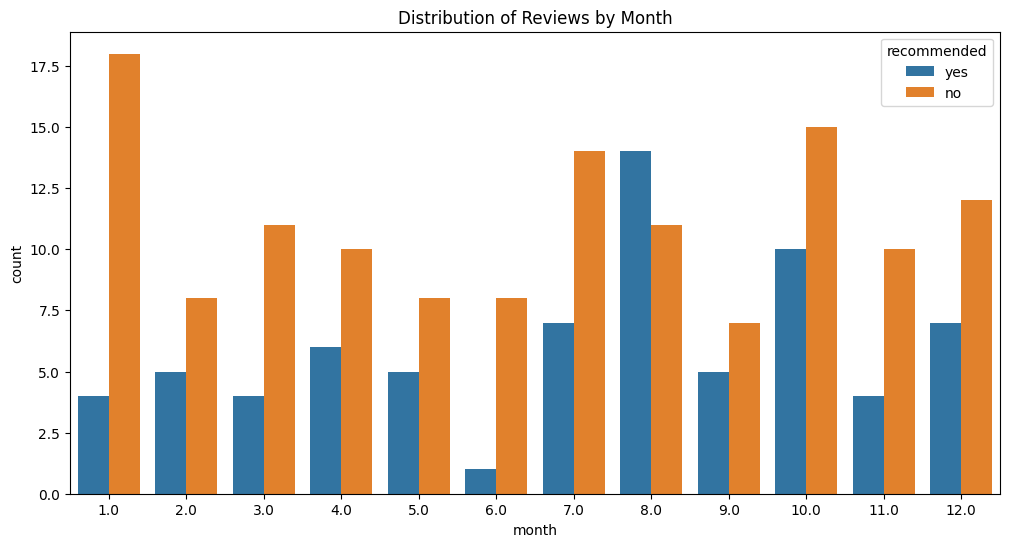

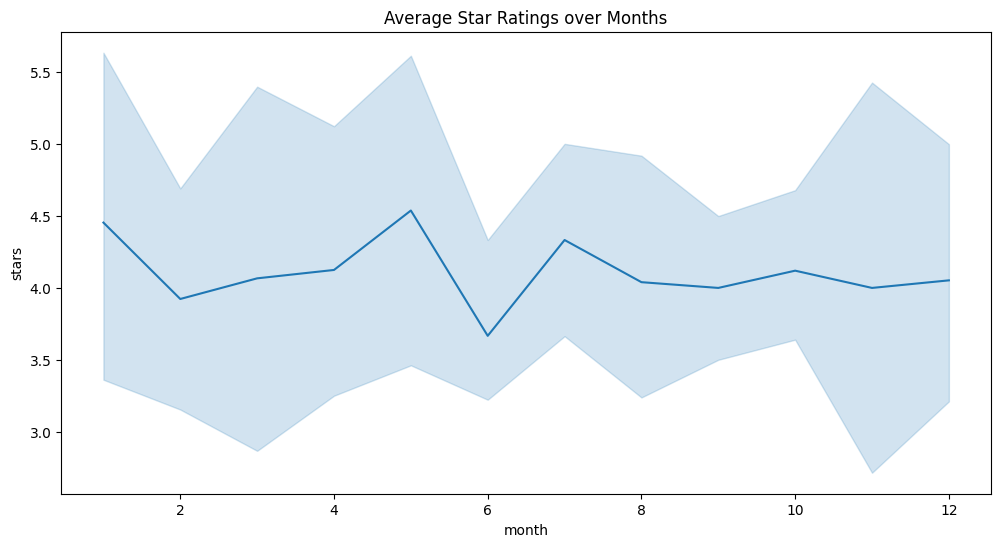

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Date Analysis
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df, hue='recommended')
plt.title('Distribution of Reviews by Month')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='stars', data=df)
plt.title('Average Star Ratings over Months')
plt.show()


## Data visualization

### Subtask:
Visualize the data to gain insights into the distributions of key variables and identify potential relationships.


**Reasoning**:
Create the visualizations specified in the instructions to gain insights into the data.



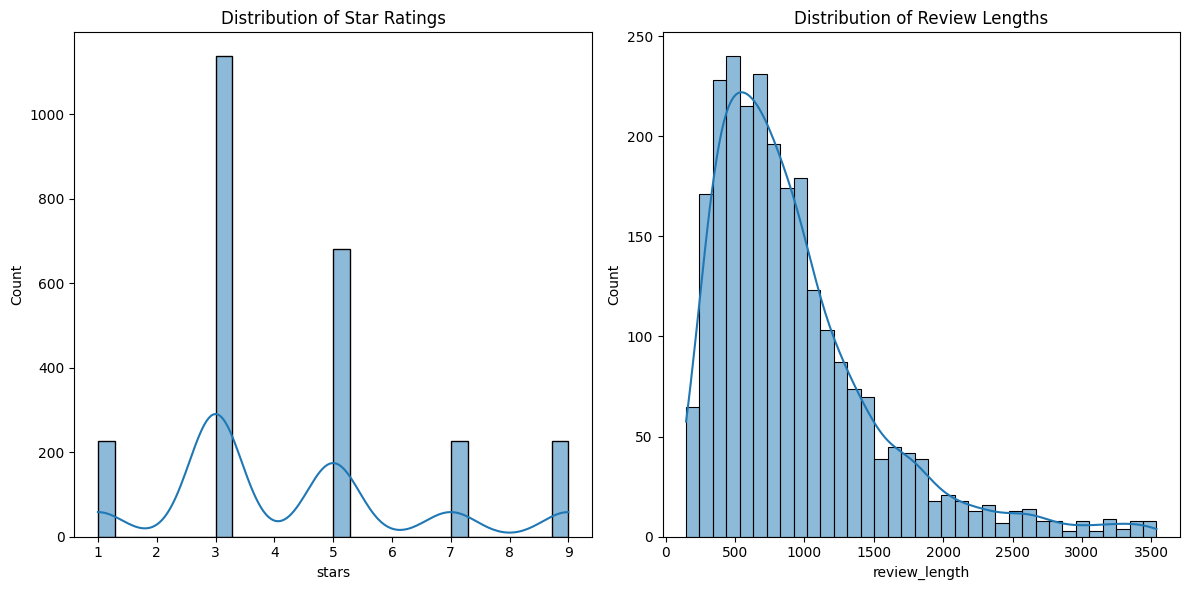

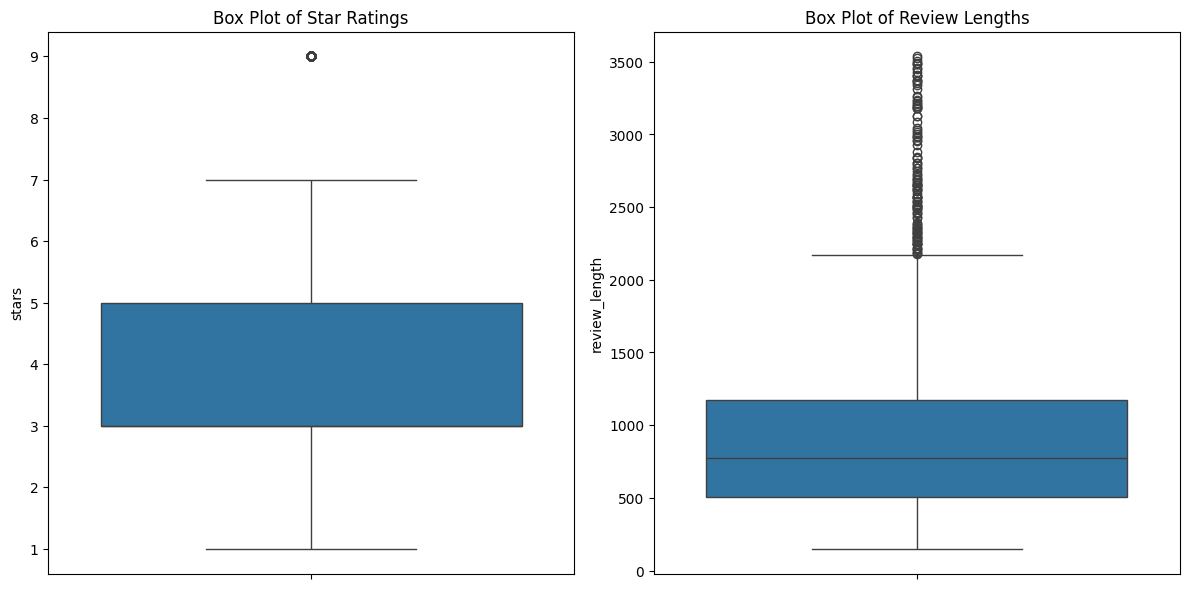

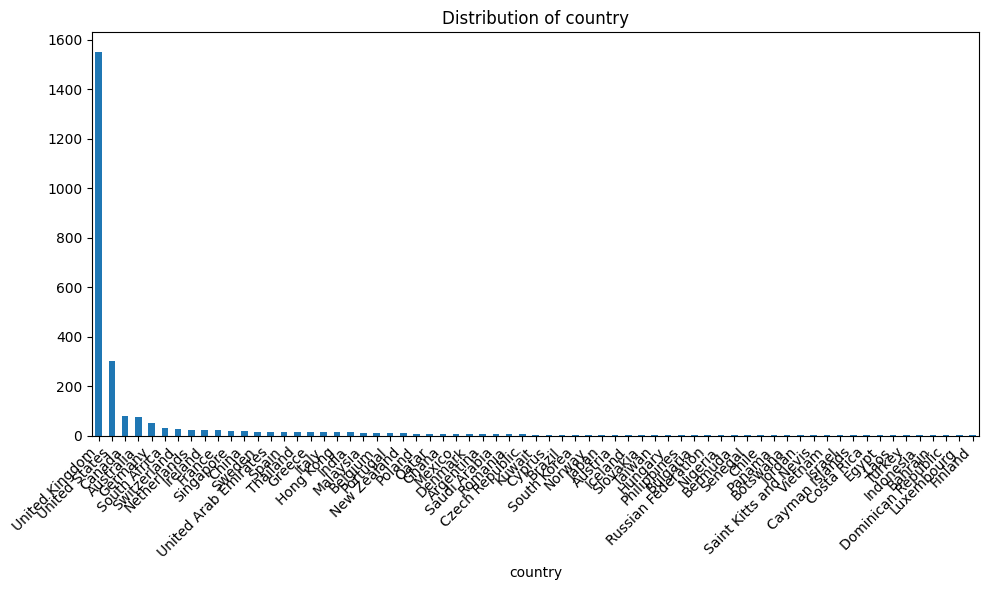

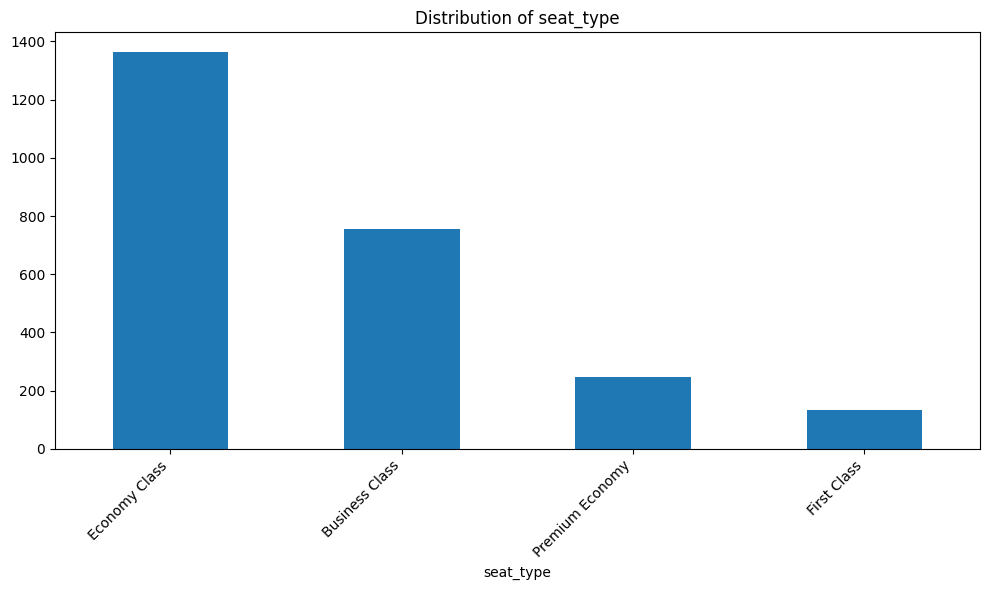

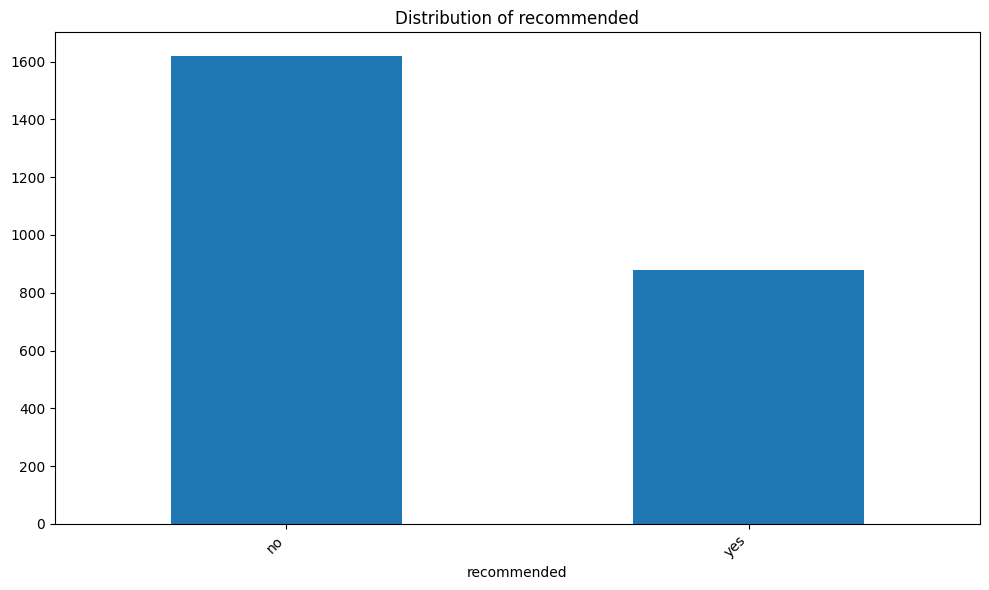

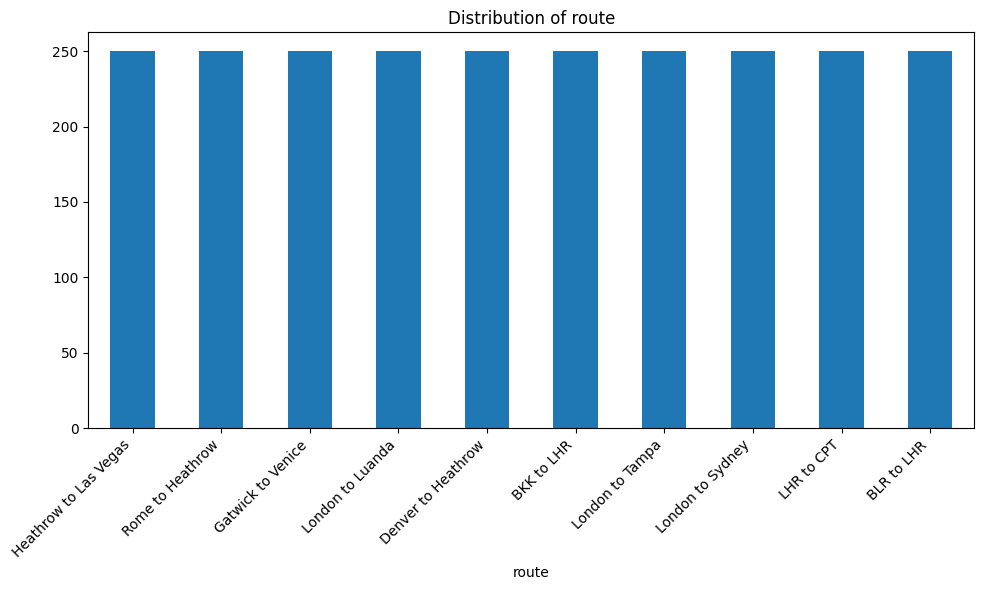

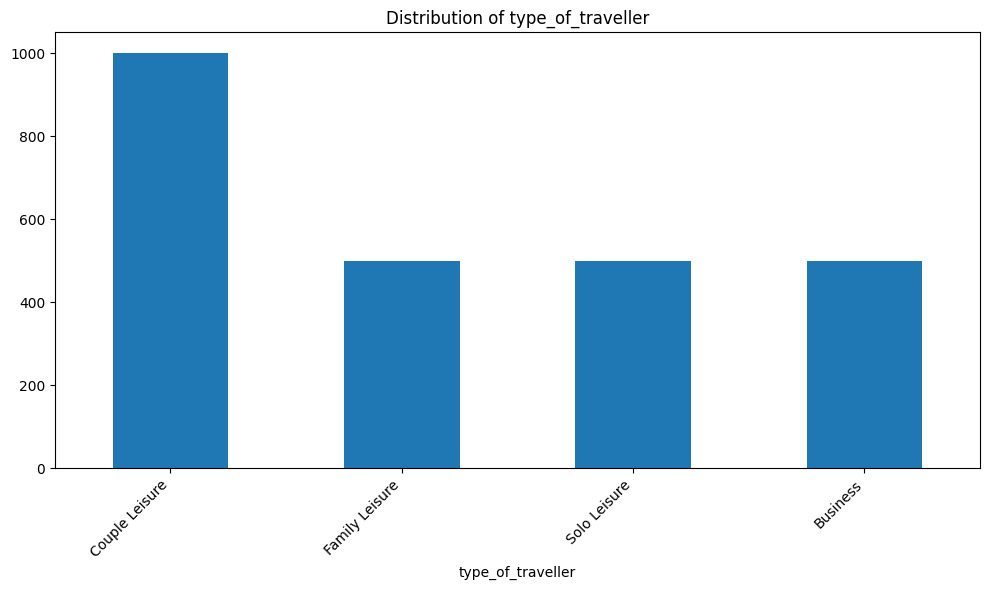

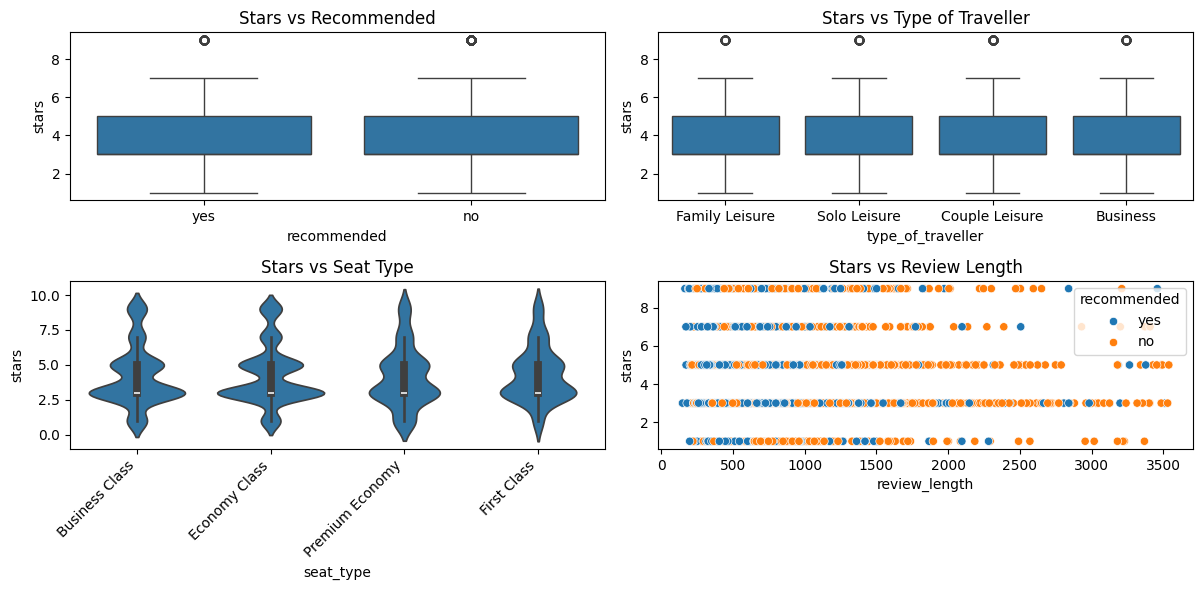

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['stars'], kde=True)
plt.title('Distribution of Star Ratings')

plt.subplot(1, 2, 2)
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['stars'])
plt.title('Box Plot of Star Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['review_length'])
plt.title('Box Plot of Review Lengths')
plt.tight_layout()
plt.show()


# Bar charts for categorical features
categorical_cols = ['country', 'seat_type', 'recommended', 'route', 'type_of_traveller']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualizations of the relationship between 'stars' and other variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['recommended'], y=df['stars'])
plt.title('Stars vs Recommended')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['type_of_traveller'], y=df['stars'])
plt.title('Stars vs Type of Traveller')

plt.subplot(2, 2, 3)
sns.violinplot(x=df['seat_type'], y=df['stars'])
plt.title('Stars vs Seat Type')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df['review_length'], y=df['stars'], hue=df['recommended'])
plt.title('Stars vs Review Length')
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

* **Data Overview**: The dataset contains 2500 customer reviews of British Airways flights, with 8 variables including review text, date, country, seat type, recommendation, star rating, route and type of traveler.  No missing values were detected.
* **Star Ratings**: The average star rating is 4.27, ranging from 1 to 9.  Visualizations suggest potential skewness and outliers in the distribution. Outlier boundaries were calculated as below 0.0 and above 8.0.
* **Review Length**: Average review length is approximately 930 characters, with potential outliers identified. Outlier boundaries were calculated as below -500.875 and above 2178.125.
* **Date Analysis:** The 'date' column was converted to datetime objects, enabling the analysis of reviews by month. The earliest dates in the sample dataset are from late July 2023. There are 1469 unique dates.
* **Categorical Variables:**  Analysis of categorical variables like 'country', 'seat_type', 'recommended', and 'type_of_traveller' revealed the most frequent categories. For example, most reviews are from the UK, the majority of travelers were in Economy Class and a significant portion of reviews indicated non-recommendation.
* **Relationships between variables**: Visualizations explored the relationships between 'stars' and other variables such as 'recommended', 'type_of_traveller', 'seat_type', and 'review_length'.


### 3. Insights or Next Steps

* **Deepen Sentiment Analysis:** Conduct a more comprehensive sentiment analysis of the 'reviews' column using advanced NLP techniques to gain a deeper understanding of customer opinions beyond simple positive word counts.
* **Investigate Trends and Seasonality**: Further explore the relationship between the date and star ratings to identify any potential trends or seasonality in customer satisfaction.  Consider exploring the distribution of reviews across the year.
